## NGram Wordcloud

### Before we begin

Before we start, you will need to have set up a [Carbonate account](https://kb.iu.edu/d/aolp) in order to access [Research Desktop (RED)](https://kb.iu.edu/d/apum). You will also need to have access to RED through the [thinlinc client](https://kb.iu.edu/d/aput). If you have not done any of this, or have only done some of this, but not all, you should go to our [textPrep-R.ipynb](textPrep-R.ipynb) before you proceed further. The textPrepPy notebook provides information and resources on how to get a Carbonate account, how to set up RED, and how to get started using the Jupyter Notebook on RED.

### Let's get started

First, we need to set our working directory (setwd). This is the folder that points to where your data is stored. In our case we have multiple folders that we may want to use at some point, but they are all contained in our Text-Analysis folder, so we will set that as our working directory.

In [1]:
# set the working directory
setwd("~/Text-Analysis")

#### Include necessary packages for notebook 

R's extensibility comes in large part from packages. Packages are groups of functions, data, and algorithms that allow users to easily carry out processes without recreating the wheel. Some packages are included in the basic installation of R, others created by R users are available for download. Make sure to have the following packages installed before beginning so that they can be accessed while running the scripts.

In R Studio, packages can be installed by navigating to Tools in the menu bar > Install Packages. Or in the bottom right panel click on the "packages" tab and then click on "install."

- **tm:** This package provides tools (functions) for performing various types of text mining. In this script, we will use tm to performing text cleaning in order to have uniform data for analysis. Check out [this link](https://cran.r-project.org/web/packages/tm/vignettes/tm.pdf) for the documentation!
- **wordcloud:** Plots wordclouds.
- **ngram:** This is a collection of utilities for creating, displaying, summarizing, and "babbling" n-grams.
- **stringr:** A consistent, simple and easy to use set of wrappers around the fantastic 'stringi' package.
- **readtext:** Functions for importing and handling text files and formatted text files with additional meta-data, such including '.csv', '.tab', '.json', '.xml', '.html', '.pdf', '.doc', '.docx', '.xls', '.xlsx', and others.

In [2]:
library(tm)
library(wordcloud)
library(ngram)
library(stringr)
library(readtext)

Loading required package: NLP
Loading required package: RColorBrewer


### Read in data
Here we read in the data. To read in a sepcific file, simply type the file path ending with the file name. To read an entire directory, simply put '*.txt' to read all .txt files in the directory.  

In [3]:
mycorpus <- readtext('data/StarTrekNextGenClean/season1/*.txt')

### Clean text
To clean the corpus in this example, we are using the tm package's built in tools to:
1. Convert all the text to lower case, so that "Love" and "love" are not seen as seperate words.
2. Scan in personal stopword list if you have one. (commented out for now)
3. Remove stopwords. We use tm's options for stopword lists. You can also add in your personal list from step 2 or individual words that might need to be removed because of your specific dataset.
4. Remove all punctuation so that only alphanumeric characters are read.
5. Eliminate numbers, especially if they skew your results any, however, numbers may also be important, so that is why this one is optional.
6. Remove extra white space.

In [4]:
# Clean the corpus
mycorpus <- tolower(mycorpus)
#myStopWords <- scan("data/earlyModernStopword.txt", what="character", sep="\n")
mycorpus <- removeWords(mycorpus, stopwords("SMART"))
mycorpus <- removePunctuation(mycorpus)
mycorpus <- removeNumbers(mycorpus)
mycorpus <- stripWhitespace(mycorpus)

### Create ngrams
We use the ngram_asweka function from the ngram package to make our ngram. We tell it what we want to have ngrams pulled from, then specify the minimum and maximum number of words (so this can be turned into a trigram search too) and then choose how you want the words in the ngram to be separated. Right now we are separating them by a space. Next we put all the ngrams into a dataframe that we then turn into a table. Finally, we order the table so that it goes from highest to lowest frequency.

In [5]:
# collect most frequent bigrams
mycorpus <- toString(mycorpus)
ntoken <- ngram_asweka(mycorpus, min = 2, max = 2, sep = " ")
ngrm_word <- data.frame(table(ntoken))
sort_ngrm <- ngrm_word[order(ngrm_word$Freq,decreasing=TRUE),]

head(sort_ngrm, 10)

,ntoken,Freq
4011,captain picard,106
5414,commander riker,84
2060,aye sir,83
17592,lieutenant yar,69
3951,captain log,66
19949,mister data,63
8792,doctor crusher,56
18062,log stardate,46
13548,hailing frequencies,40
32358,transporter room,37


### Remove ngram stopwords

Only use this if you find ngrams in the wordcloud that you need to remove. Just add words in quotes and separated by a comma to the stop_words list below. Run this box of code and then rerun the wordcloud.

In [6]:
stop_words <- c('aye sir', 'sir sir')
sort_ngrm$ntoken <- gsub(paste0(stop_words, collapse = "|"), "", sort_ngrm$ntoken)

### Plot the wordcloud
First we call the wordcloud function from the wordcloud package. Then we specify that we want to display the items in the ntoken column of our table and display them based on the numbers in the Freq column. Then we put the random order as "FALSE" so that the most used ngram is centered and then goes out from there. Next we scale the output, choose how frequently the ngram needs to occur to be plotted, choose our color scheme, and finally choose the top number of ngrams to display (such as top 50, or top 75, et cetera).

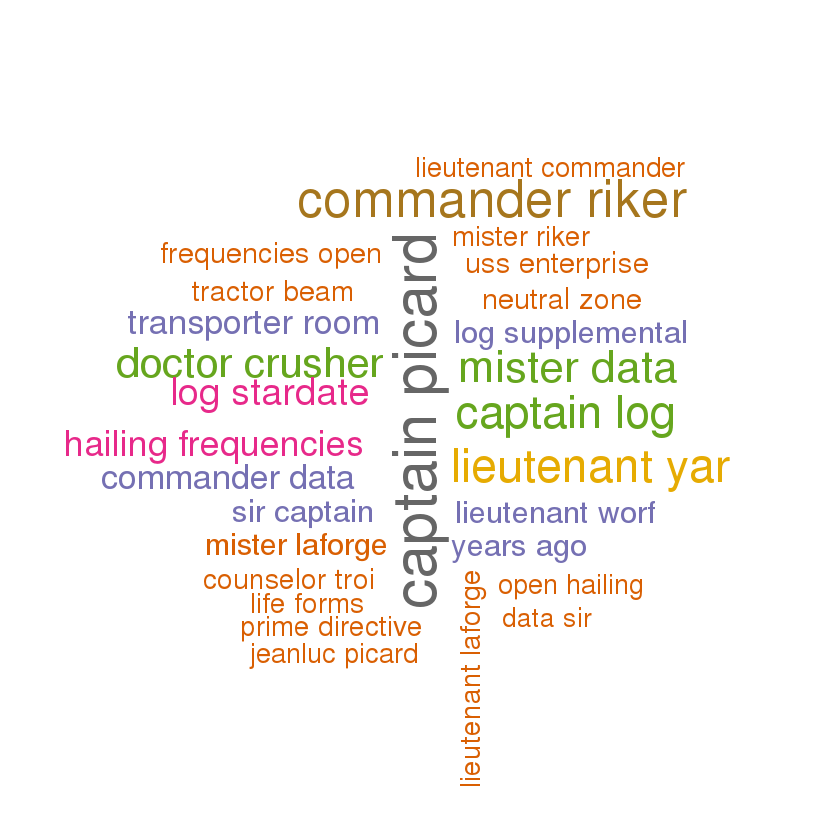

In [7]:
# Plot bigram wordcloud
wordcloud(sort_ngrm$ntoken,sort_ngrm$Freq,random.order=FALSE,scale = c(3,1),min.freq = 2,colors = brewer.pal(8,"Dark2"),max.words=30)

## VOILA!!